<a href="https://colab.research.google.com/github/Squirrel-hub/Handwritten-Digit-Classifier/blob/main/Hand_WrittenDigits_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**NAME :** KAIZER RAHAMAN
#**ROLL NUMBER :** 19IE10044

# Hand Written Digits Classification using Convolution Neural Networks 

Importing Libraries

In [1]:
import  numpy as np
from    keras.datasets import mnist
import	matplotlib.pyplot as plt 
from	keras.optimizers import Adam 
from	keras.models	import Sequential
from    keras.layers import Dense
from    sklearn.model_selection import train_test_split
from    keras.layers import Conv2D
from    keras.layers import Flatten
from    keras.layers import MaxPool2D
from    keras.layers import Dropout
from	keras.datasets import mnist 
import	matplotlib.pyplot	as plt
from	sklearn.model_selection import train_test_split 

In [2]:
seed_val = 9000 
np.random.seed(seed_val) # setting a random seed to repeteadly generate the same training instance

In [3]:
#Unpacking the Mnist data
(X_train,y_train),(X_test,y_test) = mnist.load_data() 

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
print('Size of the training_set: ',X_train.shape) 
print('Size of the test_set: ',X_test.shape) 
print('Shape of each image: ',X_train[0].shape) 
print('Total number of classes: ',len(np.unique(y_train))) 
print('Unique class labels: ',np.unique(y_train)) 

Size	of	the	training_set:	 (60000, 28, 28)
Size	of	the	test_set:	 (10000, 28, 28)
Shape	of	each	image:	 (28, 28)
Total	number	of	classes:	 10
Unique	class	labels:	 [0 1 2 3 4 5 6 7 8 9]


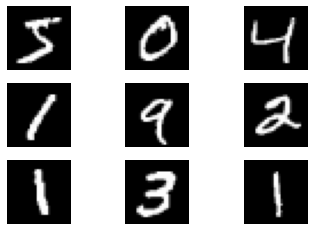

In [5]:
# Plot of 9 random images 
for i in range(0,9):				
  plt.subplot(331+i) #plot of 3 rows and 3 columns				
  plt.axis('off') #turn off axis				
  plt.imshow(X_train[i],	cmap='gray')	#	gray scale 

In [6]:
# maximum and minimum pixel values 
print('Maximum pixel value in the training_set: ',np.max(X_train)) 
print('Minimum pixel value in the training_set: ',np.min(X_train)) 

Maximum	pixel	value	in	the	training_set:	 255
Minimum	pixel	value	in	the	training_set:	 0


In [7]:
!pip install keras

In [8]:
# Number of epochs 
epochs = 20
# Batchsize 
batch_size = 128
# Optimizer for the generator 
optimizer = Adam(lr=0.0001)
# Shape of the input image 
input_shape = (28,28,1) 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


#**Fully Connected neural Network**

In [9]:
 model = Sequential() 

In [11]:
model.add(Dense(300,input_shape=(784,),activation ='relu'))
model.add(Dense(300,activation='relu'))
model.add(Dense(10,	activation='softmax'))

In [12]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer=optimizer , metrics = ['accuracy'])

In [13]:
# print model summary 
model.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                3010      
Total params: 328,810
Trainable params: 328,810
Non-trainable params: 0
_________________________________________________________________


In [14]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify = y_train, test_size = 0.08333, random_state=42)

X_train = X_train.reshape(-1, 784)
X_val = X_val.reshape(-1, 784)
X_test = X_test.reshape(-1, 784)

print('Training Examples', X_train.shape[0])
print('Validation Examples', X_val.shape[0])
print('Test Examples', X_test.shape[0])

Training Examples 55000
Validation Examples 5000
Test Examples 10000


In [15]:
history = model.fit(X_train, y_train, epochs = epochs, batch_size=batch_size, validation_data=(X_val, y_val))

Epoch 1/20
430/430 [==============================] - 16s 4ms/step - loss: 16.0515 - accuracy: 0.6661 - val_loss: 2.3794 - val_accuracy: 0.8910
Epoch 2/20
430/430 [==============================] - 1s 3ms/step - loss: 1.7289 - accuracy: 0.9116 - val_loss: 1.5212 - val_accuracy: 0.9200
Epoch 3/20
430/430 [==============================] - 1s 3ms/step - loss: 0.9533 - accuracy: 0.9380 - val_loss: 1.2443 - val_accuracy: 0.9258
Epoch 4/20
430/430 [==============================] - 1s 3ms/step - loss: 0.5225 - accuracy: 0.9573 - val_loss: 1.0571 - val_accuracy: 0.9342
Epoch 5/20
430/430 [==============================] - 1s 3ms/step - loss: 0.3442 - accuracy: 0.9678 - val_loss: 1.0023 - val_accuracy: 0.9374
Epoch 6/20
430/430 [==============================] - 1s 3ms/step - loss: 0.2382 - accuracy: 0.9753 - val_loss: 0.9005 - val_accuracy: 0.9404
Epoch 7/20
430/430 [==============================] - 1s 3ms/step - loss: 0.1372 - accuracy: 0.9817 - val_loss: 0.8784 - val_accuracy: 0.9418
Epoc

In [16]:
loss,acc = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Accuracy:', acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.7472 - accuracy: 0.9586
Test loss: 0.7472484111785889
Accuracy: 0.9585999846458435


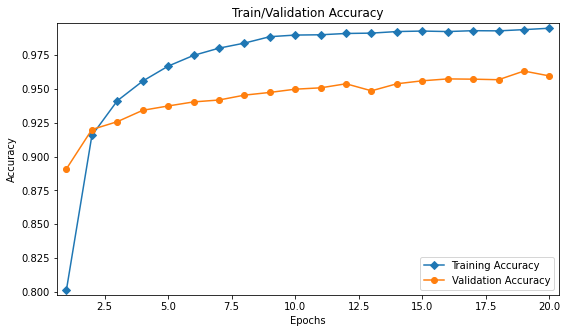

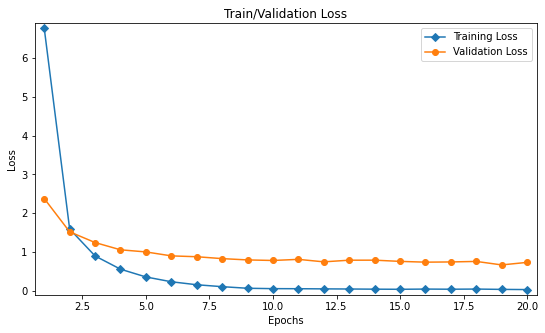

In [17]:

def loss_plot(history):
    train_acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    plt.figure(figsize=(9,5))
    plt.plot(np.arange(1,len(train_acc)+1),train_acc,  marker = 'D', label = 'Training Accuracy')
    plt.plot(np.arange(1,len(train_acc)+1),val_acc,  marker = 'o', label = 'Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Train/Validation Accuracy')
    plt.legend()
    plt.margins(0.02)
    plt.show()

    train_loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(9,5))
    plt.plot(np.arange(1,len(train_acc)+1),train_loss, marker = 'D', label = 'Training Loss')
    plt.plot(np.arange(1,len(train_acc)+1),val_loss, marker = 'o', label = 'Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Train/Validation Loss')
    plt.legend()
    plt.margins(0.02)
    plt.show()
    
loss_plot(history)

#**Convolution Neural network**

In [19]:
X_train = X_train.reshape(-1,28,28,1)
X_val = X_val.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

print('Train data shape:', X_train.shape)
print('Val data shape:', X_val.shape)
print('Test data shape:', X_test.shape)

Train data shape: (55000, 28, 28, 1)
Val data shape: (5000, 28, 28, 1)
Test data shape: (10000, 28, 28, 1)


In [20]:
model = Sequential()

In [21]:
model.add(Conv2D(32, kernel_size=(3,3), input_shape=input_shape, activation = 'relu'))

In [22]:
model.add(Flatten())

In [23]:
model.add(Dense(128, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

In [24]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer= optimizer, metrics = ['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
flatten (Flatten)            (None, 21632)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               2769024   
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 2,770,634
Trainable params: 2,770,634
Non-trainable params: 0
_________________________________________________________________


In [25]:
history = model.fit(X_train, y_train, epochs = epochs, batch_size=batch_size, validation_data=(X_val, y_val))

Epoch 1/20
430/430 [==============================] - 31s 5ms/step - loss: 3.4422 - accuracy: 0.8212 - val_loss: 0.2443 - val_accuracy: 0.9414
Epoch 2/20
430/430 [==============================] - 2s 4ms/step - loss: 0.1441 - accuracy: 0.9595 - val_loss: 0.1702 - val_accuracy: 0.9600
Epoch 3/20
430/430 [==============================] - 2s 4ms/step - loss: 0.0737 - accuracy: 0.9783 - val_loss: 0.1501 - val_accuracy: 0.9654
Epoch 4/20
430/430 [==============================] - 2s 4ms/step - loss: 0.0438 - accuracy: 0.9867 - val_loss: 0.1353 - val_accuracy: 0.9694
Epoch 5/20
430/430 [==============================] - 2s 4ms/step - loss: 0.0276 - accuracy: 0.9919 - val_loss: 0.1224 - val_accuracy: 0.9710
Epoch 6/20
430/430 [==============================] - 2s 4ms/step - loss: 0.0165 - accuracy: 0.9953 - val_loss: 0.1248 - val_accuracy: 0.9718
Epoch 7/20
430/430 [==============================] - 2s 4ms/step - loss: 0.0122 - accuracy: 0.9970 - val_loss: 0.1295 - val_accuracy: 0.9726
Epoch

In [26]:
loss,acc = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Accuracy:', acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1207 - accuracy: 0.9805
Test loss: 0.12066441774368286
Accuracy: 0.9804999828338623


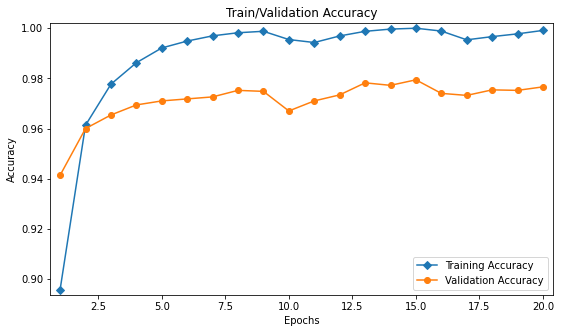

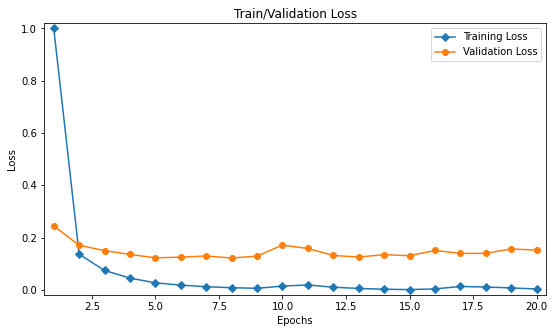

In [27]:
loss_plot(history)

#**Pooling**

In [28]:
array = np.array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1])
result = np.zeros(len(array)//2)
for i in range(len(array)//2):
    result[i] = np.max(array[2*i:2*i+2])
result

array([1., 1., 1., 1., 1.])

In [29]:
array = np.array([0, 1, 0, 1, 0, 1, 0, 1, 0, 1])
result = np.zeros(len(array)//2)
for i in range(len(array)//2):
    result[i] = np.mean(array[2*i:2*i+2])
result

array([0.5, 0.5, 0.5, 0.5, 0.5])

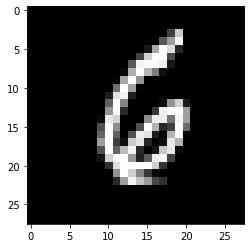

In [30]:
plt.imshow(X_train[0].reshape(28,28), cmap='gray')

In [31]:
def square_max_pool(image, pool_size=2):
    result = np.zeros((14,14))
    for i in range(result.shape[0]):
        for j in range(result.shape[1]):
            result[i,j] = np.max(image[i*pool_size : i*pool_size+pool_size, j*pool_size : j*pool_size+pool_size])
            
    return result

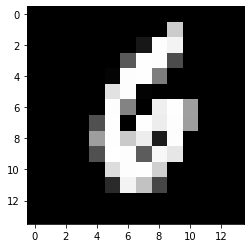

In [32]:
plt.imshow(square_max_pool(X_train[0].reshape(28,28)), cmap='gray')

In [34]:
model = Sequential() 
model.add(Conv2D(32,	kernel_size=(3,3),	input_shape=input_shape,	activation	=	'relu')) 
model.add(MaxPool2D(2,2)) 
model.add(Dropout(0.2))
model.add(Flatten()) 
model.add(Dense(128,	activation	=	'relu')) 
model.add(Dense(10,	activation	=	'softmax'))
# compile model 
model.compile(loss	=	'sparse_categorical_crossentropy',	optimizer=	optimizer,	metrics	=	['accuracy'])
# print model summary 
model.summary() 

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
________________________________________________

In [35]:
# Number of epochs 
epochs = 20 
# Batchsize 
batch_size = 128 
#	Optimizer for the generator 
optimizer = Adam(lr=0.0001) 
# Shape of the input image 
input_shape = (28,28,1)
X_train,X_val, y_train, y_val = train_test_split(X_train, y_train,stratify = y_train,test_size = 0.08333,random_state=42)
X_train = X_train.reshape(-1,28,28,1) 
X_val = X_val.reshape(-1,28,28,1) 
X_test = X_test.reshape(-1,28,28,1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [36]:
model = Sequential() 
model.add(Conv2D(32,kernel_size=(3,3),input_shape=input_shape,activation='relu')) 
model.add(MaxPool2D(2,2)) 
model.add(Flatten()) 
model.add(Dense(128,	activation	=	'relu')) 
model.add(Dense(10,	activation='softmax')) 
model.compile(loss	=	'sparse_categorical_crossentropy',	optimizer=optimizer,	metrics	=	['accuracy'])

In [37]:
history = model.fit(X_train, y_train, epochs = epochs, batch_size=batch_size,validation_data=(X_val,y_val))

Epoch 1/20
394/394 [==============================] - 3s 5ms/step - loss: 2.8732 - accuracy: 0.7778 - val_loss: 0.3419 - val_accuracy: 0.9370
Epoch 2/20
394/394 [==============================] - 1s 4ms/step - loss: 0.2451 - accuracy: 0.9505 - val_loss: 0.2218 - val_accuracy: 0.9546
Epoch 3/20
394/394 [==============================] - 2s 4ms/step - loss: 0.1188 - accuracy: 0.9723 - val_loss: 0.2061 - val_accuracy: 0.9579
Epoch 4/20
394/394 [==============================] - 2s 4ms/step - loss: 0.0675 - accuracy: 0.9818 - val_loss: 0.1563 - val_accuracy: 0.9666
Epoch 5/20
394/394 [==============================] - 1s 4ms/step - loss: 0.0457 - accuracy: 0.9865 - val_loss: 0.1574 - val_accuracy: 0.9688
Epoch 6/20
394/394 [==============================] - 2s 4ms/step - loss: 0.0343 - accuracy: 0.9896 - val_loss: 0.1436 - val_accuracy: 0.9708
Epoch 7/20
394/394 [==============================] - 1s 4ms/step - loss: 0.0191 - accuracy: 0.9942 - val_loss: 0.1819 - val_accuracy: 0.9634
Epoch 

In [38]:
loss,acc = model.evaluate(X_test,y_test) 
print('Test	loss:',loss) 
print('Accuracy:',acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1294 - accuracy: 0.9786
Test	loss: 0.1294081211090088
Accuracy: 0.978600025177002


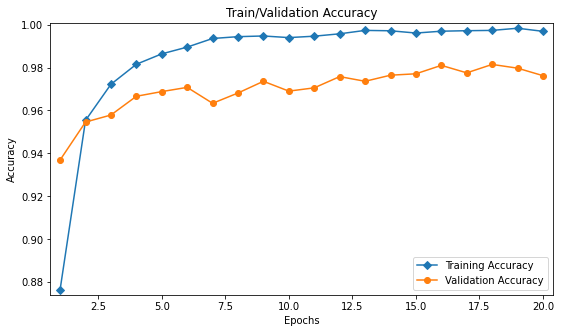

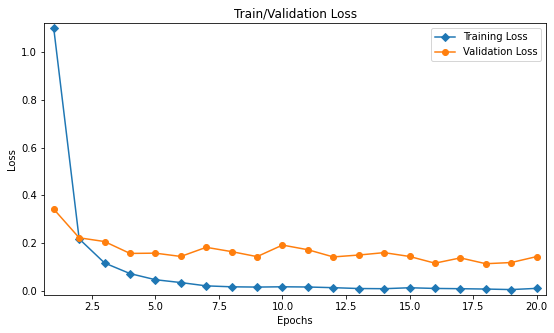

In [39]:
loss_plot(history)

#**Dropout**

In [41]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=input_shape, activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'sparse_categorical_crossentropy', optimizer= optimizer, metrics = ['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)               692352    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)               

In [42]:
history = model.fit(X_train, y_train, epochs = epochs, batch_size=batch_size, validation_data=(X_val, y_val))

Epoch 1/20
394/394 [==============================] - 3s 5ms/step - loss: 3.6301 - accuracy: 0.7094 - val_loss: 0.2861 - val_accuracy: 0.9247
Epoch 2/20
394/394 [==============================] - 2s 4ms/step - loss: 0.4492 - accuracy: 0.8797 - val_loss: 0.1968 - val_accuracy: 0.9490
Epoch 3/20
394/394 [==============================] - 2s 4ms/step - loss: 0.3329 - accuracy: 0.9095 - val_loss: 0.1598 - val_accuracy: 0.9583
Epoch 4/20
394/394 [==============================] - 2s 4ms/step - loss: 0.2557 - accuracy: 0.9279 - val_loss: 0.1422 - val_accuracy: 0.9634
Epoch 5/20
394/394 [==============================] - 2s 4ms/step - loss: 0.2086 - accuracy: 0.9405 - val_loss: 0.1202 - val_accuracy: 0.9675
Epoch 6/20
394/394 [==============================] - 2s 4ms/step - loss: 0.1788 - accuracy: 0.9466 - val_loss: 0.1039 - val_accuracy: 0.9710
Epoch 7/20
394/394 [==============================] - 2s 4ms/step - loss: 0.1594 - accuracy: 0.9536 - val_loss: 0.1023 - val_accuracy: 0.9734
Epoch 

In [43]:
loss,acc = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Accuracy:', acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0715 - accuracy: 0.9833
Test loss: 0.07147903740406036
Accuracy: 0.983299970626831


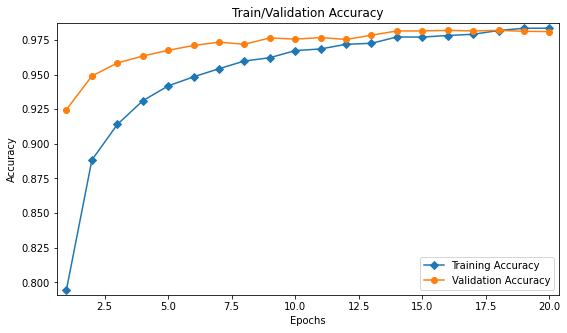

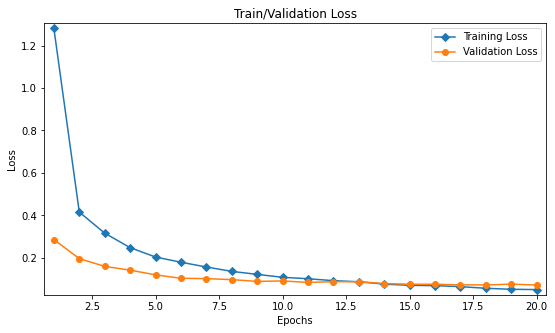

In [44]:
loss_plot(history)

#**Deeper Convolutional Networks**

In [45]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=input_shape, activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))
model.add(Conv2D(128, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'sparse_categorical_crossentropy', optimizer= optimizer, metrics = ['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 3, 3, 128)        

In [46]:
history = model.fit(X_train, y_train, epochs = 20, batch_size=128, validation_data=(X_val, y_val))

Epoch 1/20
394/394 [==============================] - 4s 7ms/step - loss: 5.0211 - accuracy: 0.3438 - val_loss: 0.5102 - val_accuracy: 0.8591
Epoch 2/20
394/394 [==============================] - 2s 6ms/step - loss: 0.8186 - accuracy: 0.7419 - val_loss: 0.2885 - val_accuracy: 0.9130
Epoch 3/20
394/394 [==============================] - 2s 6ms/step - loss: 0.5397 - accuracy: 0.8341 - val_loss: 0.2205 - val_accuracy: 0.9350
Epoch 4/20
394/394 [==============================] - 2s 5ms/step - loss: 0.4246 - accuracy: 0.8702 - val_loss: 0.1818 - val_accuracy: 0.9424
Epoch 5/20
394/394 [==============================] - 2s 5ms/step - loss: 0.3523 - accuracy: 0.8935 - val_loss: 0.1476 - val_accuracy: 0.9553
Epoch 6/20
394/394 [==============================] - 2s 6ms/step - loss: 0.3078 - accuracy: 0.9059 - val_loss: 0.1296 - val_accuracy: 0.9579
Epoch 7/20
394/394 [==============================] - 2s 6ms/step - loss: 0.2688 - accuracy: 0.9180 - val_loss: 0.1170 - val_accuracy: 0.9620
Epoch 

In [47]:
loss,acc = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Accuracy:', acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0555 - accuracy: 0.9832
Test loss: 0.05548388138413429
Accuracy: 0.9832000136375427


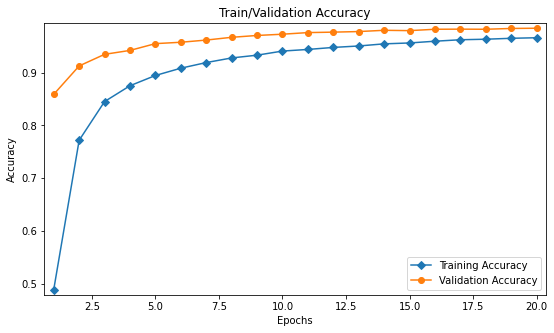

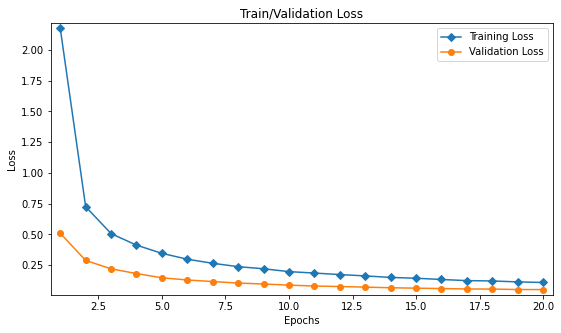

In [48]:
loss_plot(history)

In [49]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=input_shape, activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))
model.add(Conv2D(128, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))

model.compile(loss = 'sparse_categorical_crossentropy', optimizer= optimizer, metrics = ['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 3, 3, 128)        

In [50]:
history = model.fit(X_train, y_train, epochs = 40, batch_size=128, validation_data=(X_val, y_val))

Epoch 1/40
394/394 [==============================] - 4s 7ms/step - loss: 5.4099 - accuracy: 0.3573 - val_loss: 0.5281 - val_accuracy: 0.8597
Epoch 2/40
394/394 [==============================] - 2s 6ms/step - loss: 0.8126 - accuracy: 0.7463 - val_loss: 0.2924 - val_accuracy: 0.9188
Epoch 3/40
394/394 [==============================] - 2s 6ms/step - loss: 0.5403 - accuracy: 0.8346 - val_loss: 0.2152 - val_accuracy: 0.9356
Epoch 4/40
394/394 [==============================] - 2s 6ms/step - loss: 0.4247 - accuracy: 0.8717 - val_loss: 0.1724 - val_accuracy: 0.9455
Epoch 5/40
394/394 [==============================] - 2s 6ms/step - loss: 0.3500 - accuracy: 0.8931 - val_loss: 0.1474 - val_accuracy: 0.9529
Epoch 6/40
394/394 [==============================] - 2s 6ms/step - loss: 0.3093 - accuracy: 0.9056 - val_loss: 0.1272 - val_accuracy: 0.9601
Epoch 7/40
394/394 [==============================] - 2s 6ms/step - loss: 0.2681 - accuracy: 0.9190 - val_loss: 0.1123 - val_accuracy: 0.9631
Epoch 

In [51]:
loss,acc = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Accuracy:', acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0431 - accuracy: 0.9876
Test loss: 0.04310561344027519
Accuracy: 0.9876000285148621


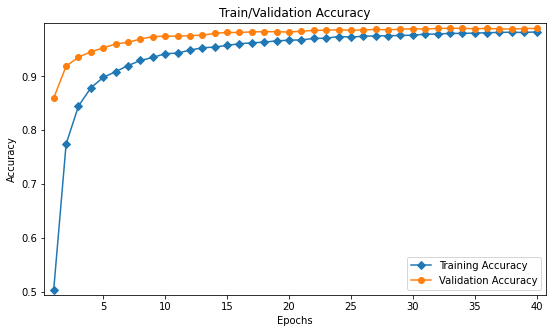

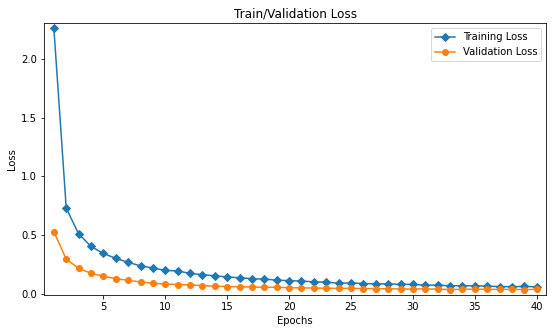

In [52]:
loss_plot(history)

#**Data Augmentation**

In [53]:
from keras.preprocessing.image import ImageDataGenerator

In [54]:
train_datagen = ImageDataGenerator(horizontal_flip=True)

In [55]:
# fit the augmentor
train_datagen.fit(X_train)

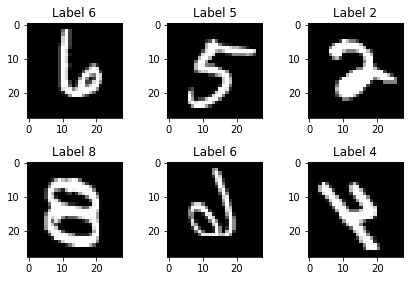

In [56]:
# transform the data
for img, label in train_datagen.flow(X_train, y_train, batch_size=6):
    for i in range(0, 6):
        plt.subplot(2,3,i+1)
        plt.title('Label {}'.format(label[i]))
        plt.imshow(img[i].reshape(28, 28), cmap='gray')
    break
plt.tight_layout()
plt.show()

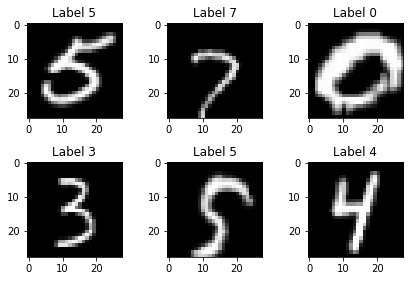

In [57]:
train_datagen = ImageDataGenerator(zoom_range=0.3)
#fit
train_datagen.fit(X_train)

#transform
for img, label in train_datagen.flow(X_train, y_train, batch_size=6):
    for i in range(0, 6):
        plt.subplot(2,3,i+1)
        plt.title('Label {}'.format(label[i]))
        plt.imshow(img[i].reshape(28, 28), cmap='gray')
    break
plt.tight_layout()
plt.show()

In [58]:
train_datagen = ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True)

In [59]:
train_datagen.fit(X_train)

In [60]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), input_shape=input_shape, activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))
model.add(Conv2D(64, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))
model.add(Conv2D(128, kernel_size=(3,3), activation = 'relu'))
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))

In [61]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer= Adam(lr=0.001), metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [62]:
history = model.fit_generator(train_datagen.flow(X_train, y_train, batch_size=128),steps_per_epoch=len(X_train) / 128, epochs=10,
                    validation_data=(train_datagen.flow(X_val, y_val)))

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
393/393 [==============================] - 12s 28ms/step - loss: 1.2434 - accuracy: 0.5716 - val_loss: 0.3124 - val_accuracy: 0.9066
Epoch 2/10
393/393 [==============================] - 11s 27ms/step - loss: 0.3972 - accuracy: 0.8738 - val_loss: 0.2068 - val_accuracy: 0.9324
Epoch 3/10
393/393 [==============================] - 11s 27ms/step - loss: 0.2828 - accuracy: 0.9140 - val_loss: 0.1618 - val_accuracy: 0.9505
Epoch 4/10
393/393 [==============================] - 11s 28ms/step - loss: 0.2246 - accuracy: 0.9308 - val_loss: 0.1244 - val_accuracy: 0.9592
Epoch 5/10
393/393 [==============================] - 12s 30ms/step - loss: 0.2033 - accuracy: 0.9364 - val_loss: 0.1270 - val_accuracy: 0.9583
Epoch 6/10
393/393 [==============================] - 12s 29ms/step - loss: 0.1884 - accuracy: 0.9427 - val_loss: 0.1025 - val_accuracy: 0.9675
Epoch 7/10
393/393 [==============================] - 11s 27ms/step - loss: 0.1643 - accuracy: 0.9501 - val_loss: 0.0946 - val_accuracy:

In [63]:
for test_img, test_lab in train_datagen.flow(X_test, y_test, batch_size = X_test.shape[0]):
    break

loss,acc = model.evaluate(test_img, test_lab)
print('Test loss:', loss)
print('Accuracy:', acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0750 - accuracy: 0.9767
Test loss: 0.07499910145998001
Accuracy: 0.9767000079154968


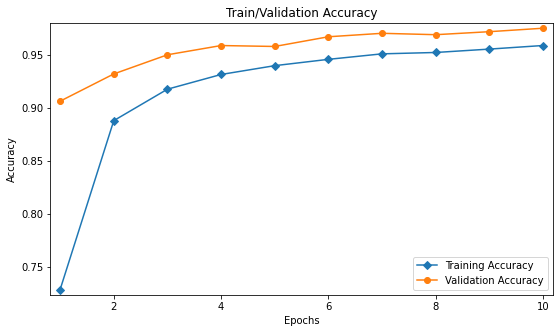

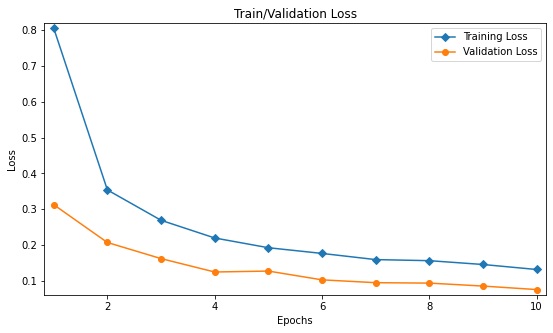

In [64]:
loss_plot(history)

#**Autoencoder**

In [65]:
%matplotlib inline
(X_train, y_train), (X_test, y_test) = mnist.load_data()

from keras.layers import MaxPooling2D,UpSampling2D
from keras.models import Model, Sequential
from keras import backend as k

# for resizing images
from skimage.transform import resize

In [66]:
def reshape(x):
    """Reshape images to 14*14"""
    img = resize(x.reshape(28,28), (14, 14))
    return img

# create 14*14 low resolution train and test images
XX_train = np.array([*map(reshape, X_train.astype(float))])
XX_test = np.array([*map(reshape, X_test.astype(float))])

In [67]:
# scale images to range between 0 and 1
#14*14 train images
XX_train = XX_train/255
#28*28 train label images
X_train = X_train/255

#14*14 test images
XX_test = XX_test/255
#28*28 test label images
X_test = X_test/255

In [68]:
batch_size = 128
epochs = 40
input_shape = (14,14,1)

def make_autoencoder(input_shape):
    
    generator = Sequential()
    generator.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    generator.add(MaxPooling2D(pool_size=(2, 2)))
    
    generator.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    
    generator.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    generator.add(UpSampling2D((2, 2)))
    
    generator.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    generator.add(UpSampling2D((2, 2)))
    
    generator.add(Conv2D(1, (3, 3), activation='sigmoid', padding='same'))

    return generator


autoencoder = make_autoencoder(input_shape)
autoencoder.compile(loss='mean_squared_error', optimizer = Adam(lr=0.0002, beta_1=0.5))

autoencoder.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 14, 14, 64)        640       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 7, 7, 128)         73856     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 7, 7, 128)         147584    
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 14, 14, 64)        73792     
_________________________________________________________________
up_sampling2d_1 (UpSampling2 (None, 28, 28, 64)       

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [69]:
autoencoder_train = autoencoder.fit(XX_train.reshape(-1,14,14,1), X_train.reshape(-1,28,28,1), batch_size=batch_size,
                                    epochs=epochs,verbose=1,
                                    validation_split = 0.2)

Epoch 1/40
375/375 [==============================] - 6s 12ms/step - loss: 0.0622 - val_loss: 0.0100
Epoch 2/40
375/375 [==============================] - 4s 10ms/step - loss: 0.0084 - val_loss: 0.0062
Epoch 3/40
375/375 [==============================] - 4s 10ms/step - loss: 0.0059 - val_loss: 0.0050
Epoch 4/40
375/375 [==============================] - 4s 11ms/step - loss: 0.0049 - val_loss: 0.0043
Epoch 5/40
375/375 [==============================] - 4s 11ms/step - loss: 0.0043 - val_loss: 0.0040
Epoch 6/40
375/375 [==============================] - 4s 11ms/step - loss: 0.0039 - val_loss: 0.0036
Epoch 7/40
375/375 [==============================] - 4s 11ms/step - loss: 0.0036 - val_loss: 0.0034
Epoch 8/40
375/375 [==============================] - 4s 11ms/step - loss: 0.0034 - val_loss: 0.0032
Epoch 9/40
375/375 [==============================] - 4s 10ms/step - loss: 0.0032 - val_loss: 0.0030
Epoch 10/40
375/375 [==============================] - 4s 10ms/step - loss: 0.0030 - val_lo

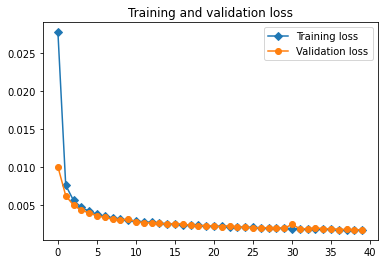

Input


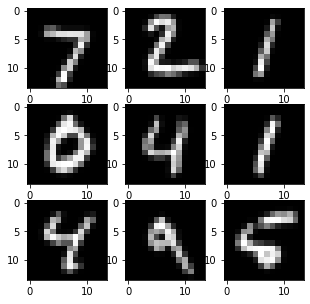

GENERATED


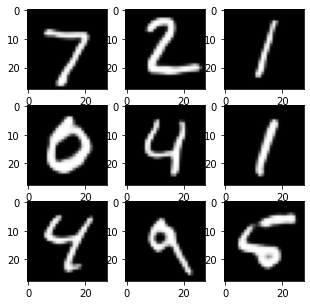

In [70]:
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs_ = [x for x in range(epochs)]
plt.figure()
plt.plot(epochs_, loss, label='Training loss', marker = 'D')
plt.plot(epochs_, val_loss, label='Validation loss', marker = 'o')
plt.title('Training and validation loss')
plt.legend()
plt.show()

print('Input')
plt.figure(figsize=(5,5))
for i in range(9):
    plt.subplot(331 + i)
    plt.imshow(np.squeeze(XX_test.reshape(-1,14,14)[i]), cmap='gray')
plt.show()

# Test set results
print('GENERATED')
plt.figure(figsize=(5,5))
for i in range(9):
    pred = autoencoder.predict(XX_test.reshape(-1,14,14,1)[i:i+1], verbose=0)
    plt.subplot(331 + i)
    plt.imshow(pred[0].reshape(28,28), cmap='gray')
plt.show()